## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [0]:
import os
import keras
from keras.layers import Dense, Input
from keras.models import Model


# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
def build_mlp(input_shape, output_units = 10, num_neurons = [512, 256, 128, 64]):

  input_layer = Input(input_shape)

  for i, neurons in enumerate(num_neurons):
    if i == 0:
      x = Dense(neurons, activation = 'relu', name = 'hidden_layer' + str(i + 1))(input_layer)
    else:
      x = Dense(units = neurons, activation = 'relu', name = 'hidden_layer' + str(i + 1))(x)
  
  out = Dense(output_units, activation = 'softmax')(x)
  
  model = Model(inputs = [input_layer], output = [out])
  return model

In [0]:

learning_rate = 0.001
epochs = 20
batch_size = 256
momentum = [0.95, 0.9, 0.85, 0.8]
nesterov = [True, False]

In [25]:
results = {}


for m in momentum:
  for n in nesterov:
    
    keras.backend.clear_session()

    print('experience in momentum %s with nesterov(%s)'%(str(m), str(n)))

    model = build_mlp(x_train.shape[1:])
    model.summary()

    optimizer = keras.optimizers.SGD(lr = learning_rate, momentum = m, nesterov = n)
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)

    model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(x_test, y_test), shuffle = True)

    exp_name = 'exp-m-%s-nesterov-%s'%(str(m),str(n))
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    results[exp_name] = {
        'train_acc' : train_acc,
        'valid_acc' : valid_acc,
        'train_loss' : train_loss,
        'valid_loss' : valid_loss
    }

experience in momentum 0.95 with nesterov(True)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  del sys.path[0]


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 12s 236us/step - loss: 2.0829 - acc: 0.2443 - val_loss: 1.9115 - val_acc: 0.3170
Epoch 2/20
50000/50000 [==============================] - 11s 229us/step - loss: 1.8523 - acc: 0.3435 - val_loss: 1.7953 - val_acc: 0.3711
Epoch 3/20
50000/50000 [==============================] - 11s 229us/step - loss: 1.7518 - acc: 0.3821 - val_loss: 1.7103 - val_acc: 0.3966
Epoch 4/20
50000/50000 [==============================] - 12s 233us/step - loss: 1.6787 - acc: 0.4090 - val_loss: 1.6535 - val_acc: 0.4171
Epoch 5/20
50000/50000 [==============================] - 12s 233us/step - loss: 1.6275 - acc: 0.4280 - val_loss: 1.6201 - val_acc: 0.4268
Epoch 6/20
50000/50000 [==============================] - 11s 227us/step - loss: 1.5862 - acc: 0.4390 - val_loss: 1.5712 - val_acc: 0.4416
Epoch 7/20
50000/50000 [==============================] - 12s 232us/step - loss: 1.5469 - acc: 0.4533 - val_loss: 1.

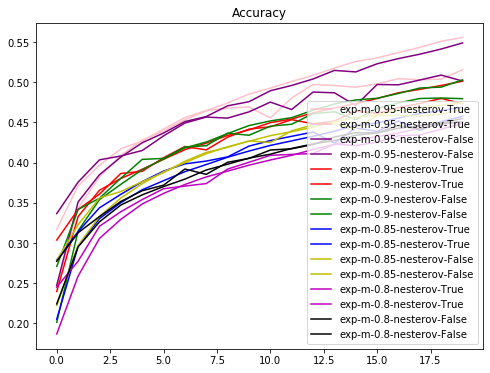

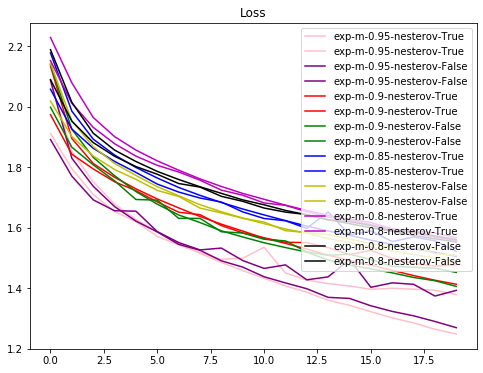

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ['pink', 'purple', "r", "g", "b", "y", "m", "k"]

plt.figure(figsize = (8, 6))
for i, result in enumerate(results.keys()):
  plt.plot(range(len(results[result]['train_acc'])), results[result]['train_acc'], '-', label = result, color = color_bar[i])
  plt.plot(range(len(results[result]['valid_acc'])), results[result]['valid_acc'], '-', label = result, color = color_bar[i])

plt.title('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize = (8, 6))
for i, result in enumerate(results.keys()):
  plt.plot(range(len(results[result]['train_loss'])), results[result]['train_loss'], '-', label = result, color = color_bar[i])
  plt.plot(range(len(results[result]['valid_loss'])), results[result]['valid_loss'], '-', label = result, color = color_bar[i])

plt.title('Loss')
plt.legend()
plt.show()